In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usd-pln-montly-historical-data/usd-pln-historical-data.csv
/kaggle/input/crude-oil-price/crude-oil-price.csv
/kaggle/input/ecodiesel-price-pl/ceny-paliw-lotos.csv


In [2]:
oil_price = pd.read_csv("/kaggle/input/crude-oil-price/crude-oil-price.csv", parse_dates = ['date'])

In [3]:
oil_price.shape

(483, 4)

In [4]:
oil_price.head()

,date,price,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646,1.36
2,1983-05-02,30.25,-1.241,-0.38
3,1983-06-01,31.38,3.736,1.13
4,1983-07-01,32.00,1.976,0.62


In [5]:
oil_price.tail()

,date,price,percentChange,change
478,2023-01-03,79.1700,-1.591,-1.2800
479,2023-02-01,77.1900,-2.501,-1.9800
480,2023-03-01,75.8000,-1.801,-1.3900
481,2023-04-03,76.7800,1.293,0.9800
482,2023-05-01,73.1522,-4.725,-3.6278


In [6]:
oil_price.price.describe()

count    483.000000
mean      45.274580
std       28.872469
min       10.420000
25%       20.340000
50%       31.590000
75%       66.275000
max      140.000000
Name: price, dtype: float64

In [7]:
oil_price[pd.isnull(oil_price.price)]

,date,price,percentChange,change


In [8]:
oil_price[pd.isnull(oil_price.date)]

,date,price,percentChange,change


In [9]:
names = ['date','price']
oil_price_cut = oil_price[names]

In [10]:
oil_price_cut.head()

,date,price
0,1983-03-30,29.27
1,1983-04-04,30.63
2,1983-05-02,30.25
3,1983-06-01,31.38
4,1983-07-01,32.00


In [11]:
#oil_price.drop('percentChange', axis=1, inplace=True)


In [12]:
oil_price.drop('change', axis=1, inplace=True)

In [13]:
oil_price.head()

,date,price,percentChange
0,1983-03-30,29.27,NaN
1,1983-04-04,30.63,4.646
2,1983-05-02,30.25,-1.241
3,1983-06-01,31.38,3.736
4,1983-07-01,32.00,1.976


In [14]:
oil_price = oil_price[oil_price.date > '2019-12-31']

In [15]:
oil_price.head()

,date,price,percentChange
442,2020-01-01,51.56,-15.135
443,2020-02-03,44.76,-13.189
444,2020-03-02,20.48,-54.245
445,2020-04-01,18.84,-8.008
446,2020-05-01,35.49,88.376


In [16]:
oil_price.shape

(41, 3)

In [17]:
usd_pln = pd.read_csv('/kaggle/input/usd-pln-montly-historical-data/usd-pln-historical-data.csv', parse_dates = ['Data'], decimal = ',')

In [18]:
usd_pln.head()

,Data,Ostatnio,Otwarcie,Max.,Min.,Wol.,Zmiana%
0,2023-01-05,4.1418,4.1694,4.2028,4.1055,NaN,"-0,41%"
1,2023-01-04,4.1590,4.3163,4.3436,4.1255,NaN,"-3,53%"
2,2023-01-03,4.3113,4.4487,4.4717,4.2778,NaN,"-3,05%"
3,2023-01-02,4.4470,4.3351,4.5033,4.2639,NaN,"2,63%"
4,2023-01-01,4.3331,4.3816,4.4802,4.3129,NaN,"-1,01%"


In [19]:
usd_pln.dtypes

Data        datetime64[ns]
Ostatnio           float64
Otwarcie           float64
Max.               float64
Min.               float64
Wol.               float64
Zmiana%             object
dtype: object

In [20]:
usd_pln_names = ['Data','Ostatnio']
usd_pln = usd_pln[usd_pln_names]

In [21]:
usd_pln.head()

,Data,Ostatnio
0,2023-01-05,4.1418
1,2023-01-04,4.1590
2,2023-01-03,4.3113
3,2023-01-02,4.4470
4,2023-01-01,4.3331


In [22]:
usd_pln.shape

(100, 2)

In [23]:
usd_pln = usd_pln[usd_pln.Data > '2019-12-31']

In [24]:
usd_pln.shape

(41, 2)

In [25]:
usd_pln.rename(columns={'Ostatnio':'usd-pln'}, inplace = True)

In [26]:
usd_pln.head()

,Data,usd-pln
0,2023-01-05,4.1418
1,2023-01-04,4.1590
2,2023-01-03,4.3113
3,2023-01-02,4.4470
4,2023-01-01,4.3331


In [27]:
oil_price.head()

,date,price,percentChange
442,2020-01-01,51.56,-15.135
443,2020-02-03,44.76,-13.189
444,2020-03-02,20.48,-54.245
445,2020-04-01,18.84,-8.008
446,2020-05-01,35.49,88.376


In [28]:
oil_price.dtypes

date             datetime64[ns]
price                   float64
percentChange           float64
dtype: object

In [29]:
oil_price.reset_index(drop=True, inplace = True)

In [30]:
oil_price.head()

,date,price,percentChange
0,2020-01-01,51.56,-15.135
1,2020-02-03,44.76,-13.189
2,2020-03-02,20.48,-54.245
3,2020-04-01,18.84,-8.008
4,2020-05-01,35.49,88.376


In [31]:
usd_pln.head()

,Data,usd-pln
0,2023-01-05,4.1418
1,2023-01-04,4.1590
2,2023-01-03,4.3113
3,2023-01-02,4.4470
4,2023-01-01,4.3331


In [32]:
usd_pln = usd_pln['usd-pln']

In [33]:
usd_pln.head()

0    4.1418
1    4.1590
2    4.3113
3    4.4470
4    4.3331
Name: usd-pln, dtype: float64

In [34]:
df_merged = pd.concat([oil_price, usd_pln], axis=1)

In [35]:
df_merged.head()

,date,price,percentChange,usd-pln
0,2020-01-01,51.56,-15.135,4.1418
1,2020-02-03,44.76,-13.189,4.1590
2,2020-03-02,20.48,-54.245,4.3113
3,2020-04-01,18.84,-8.008,4.4470
4,2020-05-01,35.49,88.376,4.3331


In [36]:
df_merged.rename(columns={'usd-pln':'usd_pln'}, inplace = True)

In [37]:
df_merged['price-pln'] = df_merged.price * df_merged.usd_pln

In [38]:
df_merged.head()

,date,price,percentChange,usd_pln,price-pln
0,2020-01-01,51.56,-15.135,4.1418,213.551208
1,2020-02-03,44.76,-13.189,4.1590,186.156840
2,2020-03-02,20.48,-54.245,4.3113,88.295424
3,2020-04-01,18.84,-8.008,4.4470,83.781480
4,2020-05-01,35.49,88.376,4.3331,153.781719


In [39]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Setup Complete


In [40]:
df_merged.dtypes

date             datetime64[ns]
price                   float64
percentChange           float64
usd_pln                 float64
price-pln               float64
dtype: object

<AxesSubplot: >

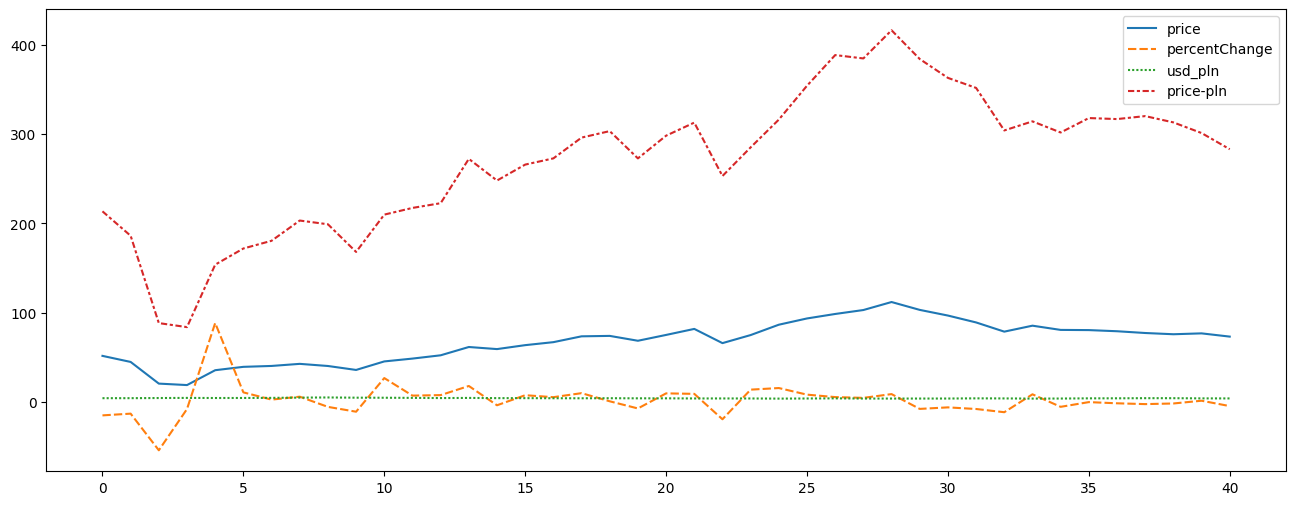

In [41]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=df_merged)

In [42]:
df_merged.set_index('date', inplace = True)
df_merged.head()

,price,percentChange,usd_pln,price-pln
date,,,,
2020-01-01,51.56,-15.135,4.1418,213.551208
2020-02-03,44.76,-13.189,4.1590,186.156840
2020-03-02,20.48,-54.245,4.3113,88.295424
2020-04-01,18.84,-8.008,4.4470,83.781480
2020-05-01,35.49,88.376,4.3331,153.781719


<AxesSubplot: xlabel='date'>

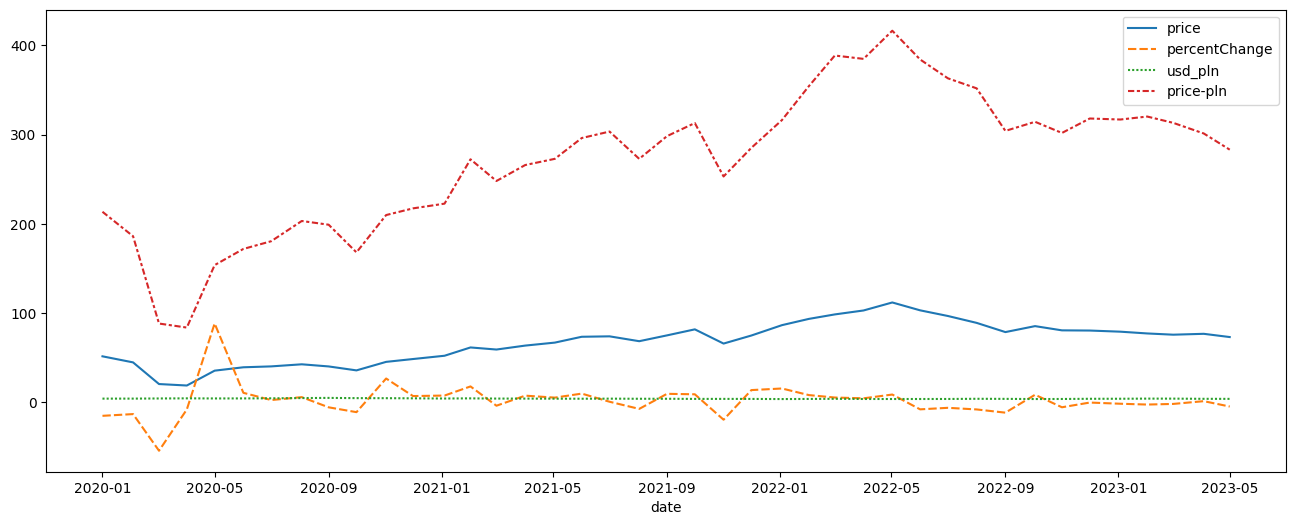

In [43]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=df_merged)

<AxesSubplot: xlabel='date'>

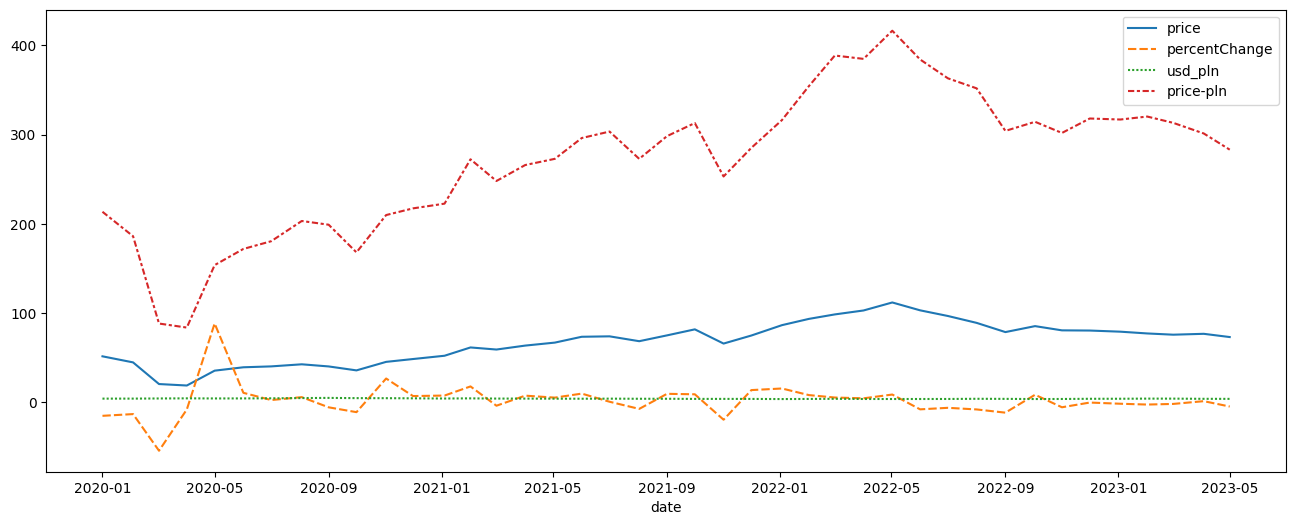

In [44]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_merged)

In [45]:
diesel_price = pd.read_csv('/kaggle/input/ecodiesel-price-pl/ceny-paliw-lotos.csv',sep=';', decimal = ',')

In [46]:
diesel_price.head()

,data,cena,akcyza,oplata_paliwowa,suma,norma
0,11.05.2023,"4 881,00","1 160,00",372.9,"6 413,90",6.4139
1,10.05.2023,"4 832,00","1 160,00",372.9,"6 364,90",6.3649
2,06.05.2023,"4 794,00","1 160,00",372.9,"6 326,90",6.3269
3,05.05.2023,"4 793,00","1 160,00",372.9,"6 325,90",6.3259
4,03.05.2023,"4 910,00","1 160,00",372.9,"6 442,90",6.4429


In [47]:
diesel_price.dtypes

data                object
cena                object
akcyza              object
oplata_paliwowa    float64
suma                object
norma              float64
dtype: object

In [48]:
d_names = ['data','norma']
diesel_price = diesel_price[d_names]

In [49]:
diesel_price

,data,norma
0,11.05.2023,6.41390
1,10.05.2023,6.36490
2,06.05.2023,6.32690
3,05.05.2023,6.32590
4,03.05.2023,6.44290
...,...,...
850,09.01.2020,5.64134
851,08.01.2020,5.66834
852,04.01.2020,5.66534
853,03.01.2020,5.64334


In [50]:
diesel_price['data'] = pd.to_datetime(diesel_price['data'], dayfirst = True)

In [51]:
diesel_price.head()

,data,norma
0,2023-05-11,6.4139
1,2023-05-10,6.3649
2,2023-05-06,6.3269
3,2023-05-05,6.3259
4,2023-05-03,6.4429


In [52]:
diesel_price.dtypes

data     datetime64[ns]
norma           float64
dtype: object

In [53]:
diesel_price.tail()

,data,norma
850,2020-01-09,5.64134
851,2020-01-08,5.66834
852,2020-01-04,5.66534
853,2020-01-03,5.64334
854,2020-01-01,5.66734


In [54]:
diesel_price.head()

,data,norma
0,2023-05-11,6.4139
1,2023-05-10,6.3649
2,2023-05-06,6.3269
3,2023-05-05,6.3259
4,2023-05-03,6.4429


In [55]:
diesel_price = diesel_price.groupby(pd.PeriodIndex(diesel_price['data'], freq="M"))['norma'].mean().reset_index()

In [56]:
diesel_price.shape

(41, 2)

In [57]:
diesel_price.head()

,data,norma
0,2020-01,5.498204
1,2020-02,5.267054
2,2020-03,4.852613
3,2020-04,4.543740
4,2020-05,4.586890


In [58]:
diesel_price.dtypes

data     period[M]
norma      float64
dtype: object

In [59]:
diesel_price.shape

(41, 2)

In [60]:
diesel_price['data'] = diesel_price['data'].astype(str)
diesel_price['data'] = pd.to_datetime(diesel_price['data'])
diesel_price.dtypes

data     datetime64[ns]
norma           float64
dtype: object

In [61]:
diesel_price.head()

,data,norma
0,2020-01-01,5.498204
1,2020-02-01,5.267054
2,2020-03-01,4.852613
3,2020-04-01,4.543740
4,2020-05-01,4.586890


In [62]:
diesel_price.set_index('data',inplace = True)

In [63]:
diesel_price.head()

,norma
data,
2020-01-01,5.498204
2020-02-01,5.267054
2020-03-01,4.852613
2020-04-01,4.543740
2020-05-01,4.586890


In [64]:
diesel_price.dtypes

norma    float64
dtype: object

<AxesSubplot: xlabel='data'>

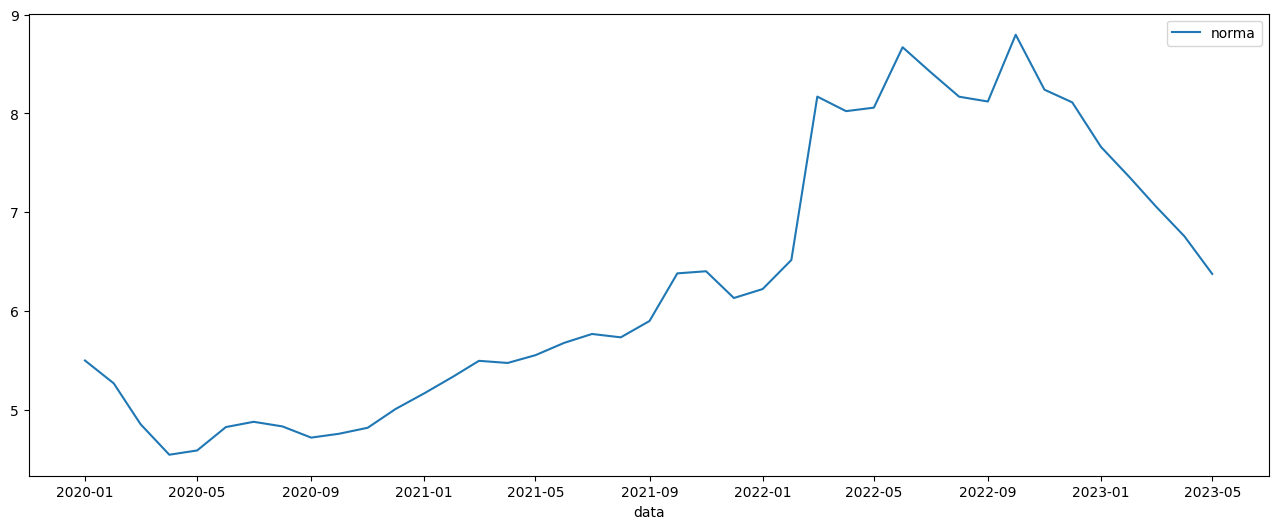

In [65]:
plt.figure(figsize=(16,6))
sns.lineplot(data=diesel_price)

In [66]:
diesel_price.rename(columns={'norma':'ecodiesel-price'}, inplace = True)

In [67]:
diesel_price.shape

(41, 1)

In [68]:
diesel_price.head()

,ecodiesel-price
data,
2020-01-01,5.498204
2020-02-01,5.267054
2020-03-01,4.852613
2020-04-01,4.543740
2020-05-01,4.586890


In [69]:
diesel_price.reset_index(inplace=True)

In [70]:
diesel_price.head()

,data,ecodiesel-price
0,2020-01-01,5.498204
1,2020-02-01,5.267054
2,2020-03-01,4.852613
3,2020-04-01,4.543740
4,2020-05-01,4.586890


In [71]:
diesel_price = diesel_price['ecodiesel-price']

In [72]:
diesel_price.head()

0    5.498204
1    5.267054
2    4.852613
3    4.543740
4    4.586890
Name: ecodiesel-price, dtype: float64

In [73]:
diesel_price.dtypes

dtype('float64')

In [74]:
df_merged.head()

,price,percentChange,usd_pln,price-pln
date,,,,
2020-01-01,51.56,-15.135,4.1418,213.551208
2020-02-03,44.76,-13.189,4.1590,186.156840
2020-03-02,20.48,-54.245,4.3113,88.295424
2020-04-01,18.84,-8.008,4.4470,83.781480
2020-05-01,35.49,88.376,4.3331,153.781719


In [75]:
df_merged.reset_index(inplace=True)

In [76]:
df_merged.head()

,date,price,percentChange,usd_pln,price-pln
0,2020-01-01,51.56,-15.135,4.1418,213.551208
1,2020-02-03,44.76,-13.189,4.1590,186.156840
2,2020-03-02,20.48,-54.245,4.3113,88.295424
3,2020-04-01,18.84,-8.008,4.4470,83.781480
4,2020-05-01,35.49,88.376,4.3331,153.781719


In [77]:
df_merged_all = pd.concat([df_merged, diesel_price], axis=1)

In [78]:
df_merged_all.head()

,date,price,percentChange,usd_pln,price-pln,ecodiesel-price
0,2020-01-01,51.56,-15.135,4.1418,213.551208,5.498204
1,2020-02-03,44.76,-13.189,4.1590,186.156840,5.267054
2,2020-03-02,20.48,-54.245,4.3113,88.295424,4.852613
3,2020-04-01,18.84,-8.008,4.4470,83.781480,4.543740
4,2020-05-01,35.49,88.376,4.3331,153.781719,4.586890


In [79]:
df_merged_all.set_index('date',inplace = True)

In [80]:
df_merged_all.head()

,price,percentChange,usd_pln,price-pln,ecodiesel-price
date,,,,,
2020-01-01,51.56,-15.135,4.1418,213.551208,5.498204
2020-02-03,44.76,-13.189,4.1590,186.156840,5.267054
2020-03-02,20.48,-54.245,4.3113,88.295424,4.852613
2020-04-01,18.84,-8.008,4.4470,83.781480,4.543740
2020-05-01,35.49,88.376,4.3331,153.781719,4.586890


<AxesSubplot: xlabel='date'>

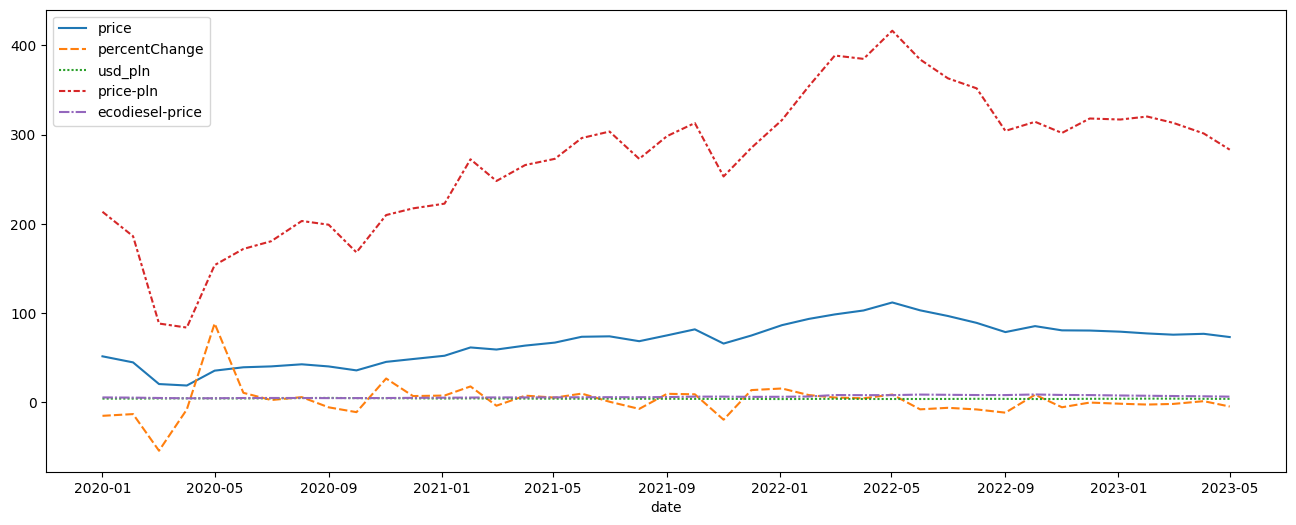

In [81]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_merged_all)

<AxesSubplot: xlabel='price-pln', ylabel='ecodiesel-price'>

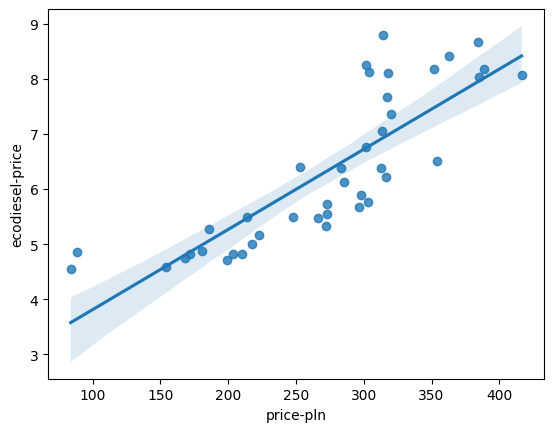

In [82]:
sns.regplot(x=df_merged_all['price-pln'], y=df_merged_all['ecodiesel-price'])

In [83]:
df_merged_all.rename(columns={'price-pln':'price_pln'}, inplace = True)
df_merged_all.rename(columns={'ecodiesel-price':'ecodiesel_price'}, inplace = True)

In [84]:
df_merged_all['ropa/cena-w-polsce'] = df_merged_all.price_pln / df_merged_all.ecodiesel_price

In [85]:
df_merged_all.head()

,price,percentChange,usd_pln,price_pln,ecodiesel_price,ropa/cena-w-polsce
date,,,,,,
2020-01-01,51.56,-15.135,4.1418,213.551208,5.498204,38.840178
2020-02-03,44.76,-13.189,4.1590,186.156840,5.267054,35.343634
2020-03-02,20.48,-54.245,4.3113,88.295424,4.852613,18.195440
2020-04-01,18.84,-8.008,4.4470,83.781480,4.543740,18.438881
2020-05-01,35.49,88.376,4.3331,153.781719,4.586890,33.526359


<AxesSubplot: xlabel='date', ylabel='ropa/cena-w-polsce'>

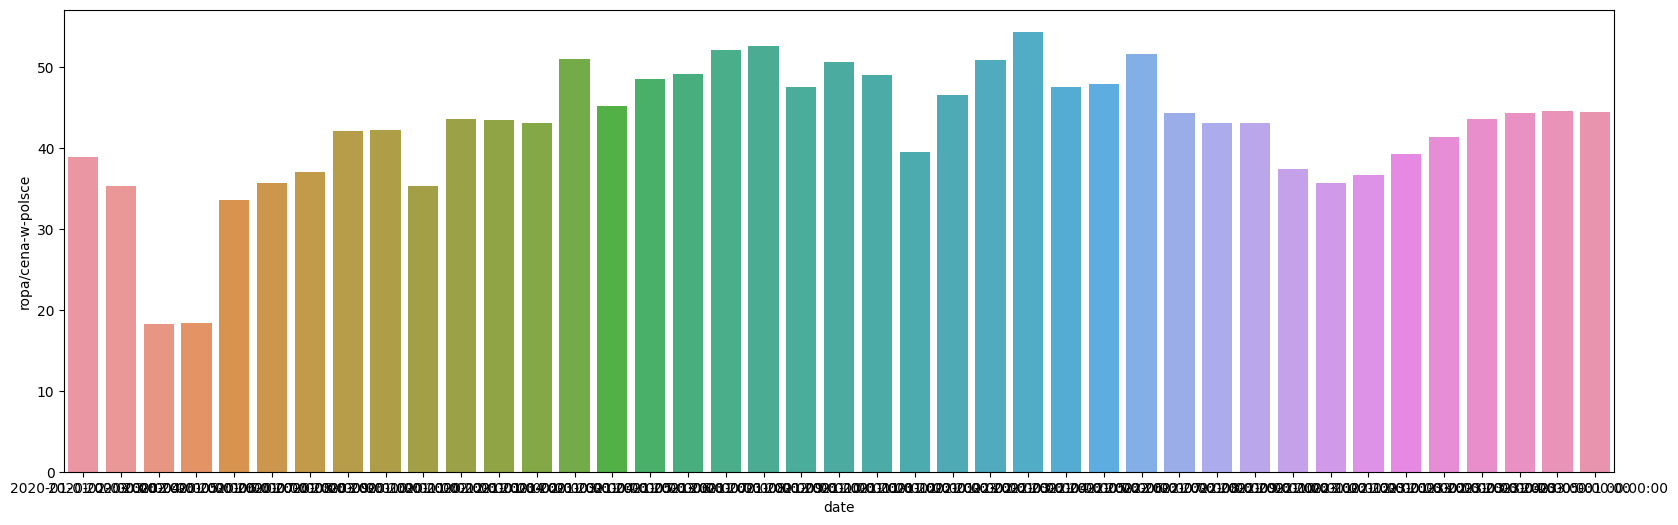

In [86]:
plt.figure(figsize=(20,6))
sns.barplot(x=df_merged_all.index, y=df_merged_all['ropa/cena-w-polsce'])